In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
STAD_mutation = pd.read_csv("/Users/shuhaoxu/Desktop/BNFO285/Groupproject/Project2/TCGA.STAD.mutations.txt", sep='\t')

In [3]:
STAD_mutation.columns

Index(['patient_id', 'Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build',
       'Chromosome', 'Start_Position', 'End_Position', 'Strand',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Tumor_Validation_Allele1', 'Tumor_Validation_Allele2', 'HGVSc',
       'HGVSp', 'Transcript_ID', 't_depth', 't_ref_count', 't_alt_count',
       'n_depth', 'Allele', 'Consequence', 'cDNA_position', 'CDS_position',
       'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation',
       'STRAND', 'CANONICAL', 'CCDS', 'ENSP', 'SWISSPROT', 'TREMBL', 'UNIPARC',
       'SIFT', 'PolyPhen', 'DOMAINS', 'IMPACT', 'VARIANT_CLASS', 'FILTER',
       'COSMIC', 'CALLERS', 'CONTEXT', 'NCALLERS'],
      dtype='object')

In [4]:
STAD_mutation.VARIANT_CLASS.value_counts()

VARIANT_CLASS
SNV             206291
deletion         23384
insertion         5075
substitution       191
Name: count, dtype: int64

In [5]:
STAD_mutation[STAD_mutation.Hugo_Symbol == "ARID1A"].Variant_Classification.value_counts()

Variant_Classification
Frame_Shift_Del      67
Nonsense_Mutation    36
Missense_Mutation    24
Frame_Shift_Ins      14
Silent                6
Splice_Site           5
Intron                3
Name: count, dtype: int64

## Variant class

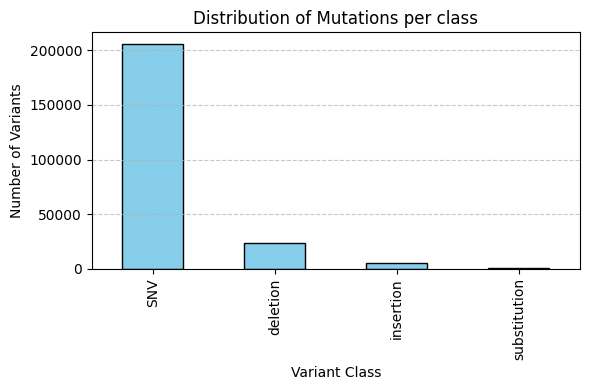

In [9]:
Variant_class = STAD_mutation.groupby("VARIANT_CLASS").count().Center
plt.figure(figsize=(6,4))
Variant_class.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Variant Class', fontsize=10)
plt.ylabel('Number of Variants', fontsize=10)
plt.title('Distribution of Mutations per class', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Number caller

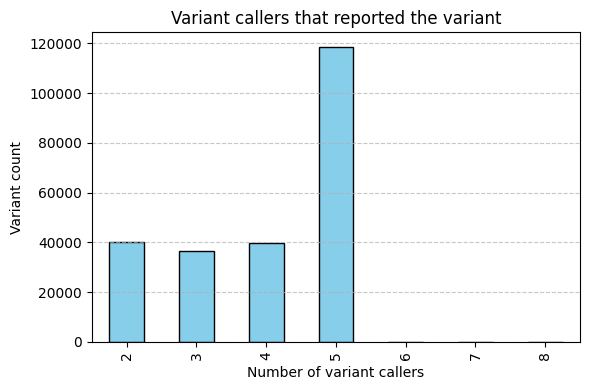

In [10]:
callers = STAD_mutation.groupby("NCALLERS").count().Center
plt.figure(figsize=(6,4))
callers.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel("Number of variant callers", fontsize=10)
plt.ylabel("Variant count", fontsize=10)
plt.title("Variant callers that reported the variant", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Check distribution of mutations among patient

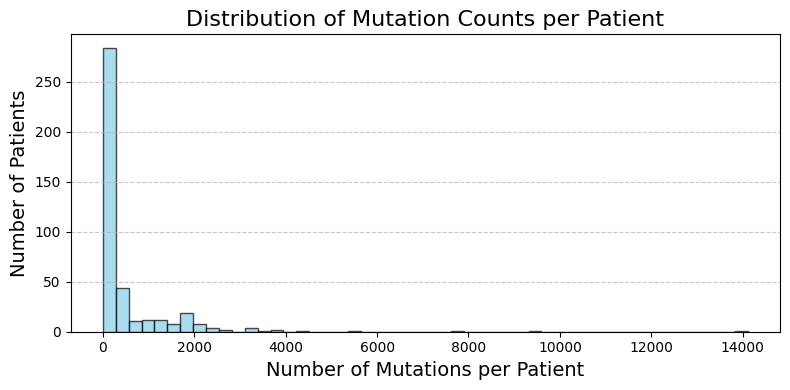

In [11]:
mutation_per_patient = STAD_mutation.groupby("patient_id").count().Center
plt.figure(figsize=(8,4))
plt.hist(mutation_per_patient, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Number of Mutations per Patient', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.title('Distribution of Mutation Counts per Patient', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Check hyper mutated genes

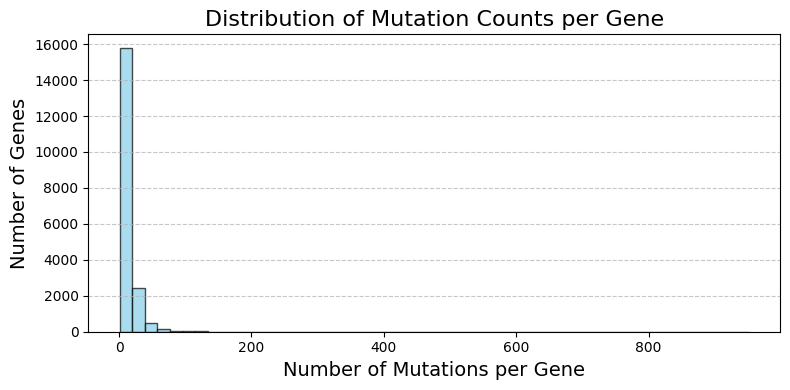

In [12]:
mutation_per_gene = STAD_mutation.groupby("Hugo_Symbol").count().Center
plt.figure(figsize=(8,4))
plt.hist(mutation_per_gene, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Number of Mutations per Gene', fontsize=14)
plt.ylabel('Number of Genes', fontsize=14)
plt.title('Distribution of Mutation Counts per Gene', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
mutation_per_gene[mutation_per_gene > 300]

Hugo_Symbol
MUC16    368
TTN      951
Name: Center, dtype: int64

# Check known mutations

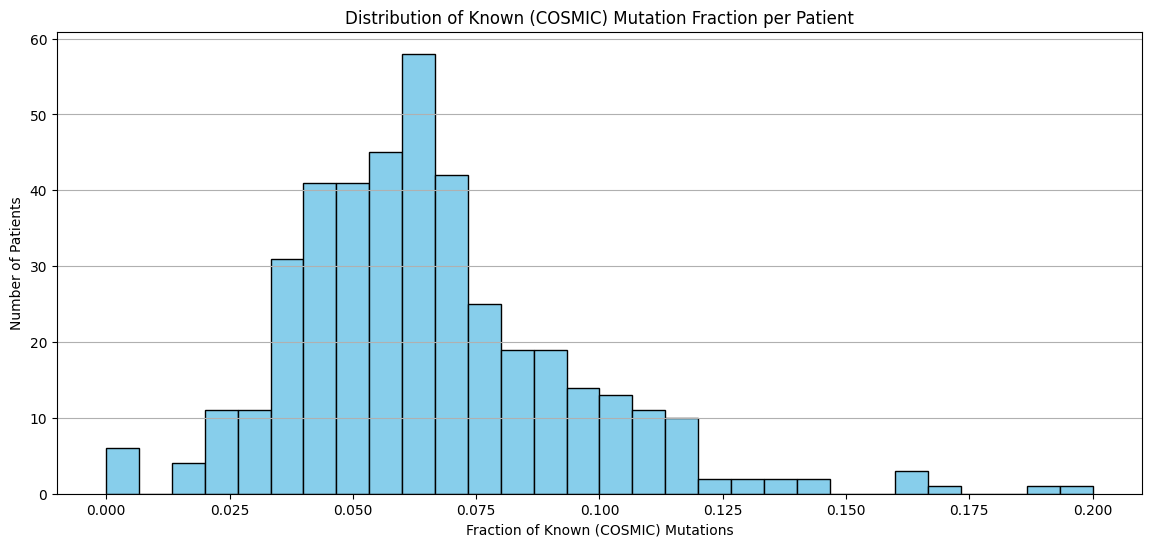

In [15]:
STAD_mutation['COSMIC_status'] = STAD_mutation['COSMIC'].apply(lambda x: 'Known' if x != "NONE" else 'Novel')
mutation_counts = STAD_mutation.groupby('patient_id').COSMIC_status.value_counts().unstack(fill_value=0)
mutation_counts['Total'] = mutation_counts['Known'] + mutation_counts['Novel']
mutation_counts['Fraction_Known'] = mutation_counts['Known'] / mutation_counts['Total']

plt.figure(figsize=(14,6))
mutation_counts['Fraction_Known'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Fraction of Known (COSMIC) Mutations')
plt.ylabel('Number of Patients')
plt.title('Distribution of Known (COSMIC) Mutation Fraction per Patient')
plt.grid(axis='y')
plt.show()

## check variant classification

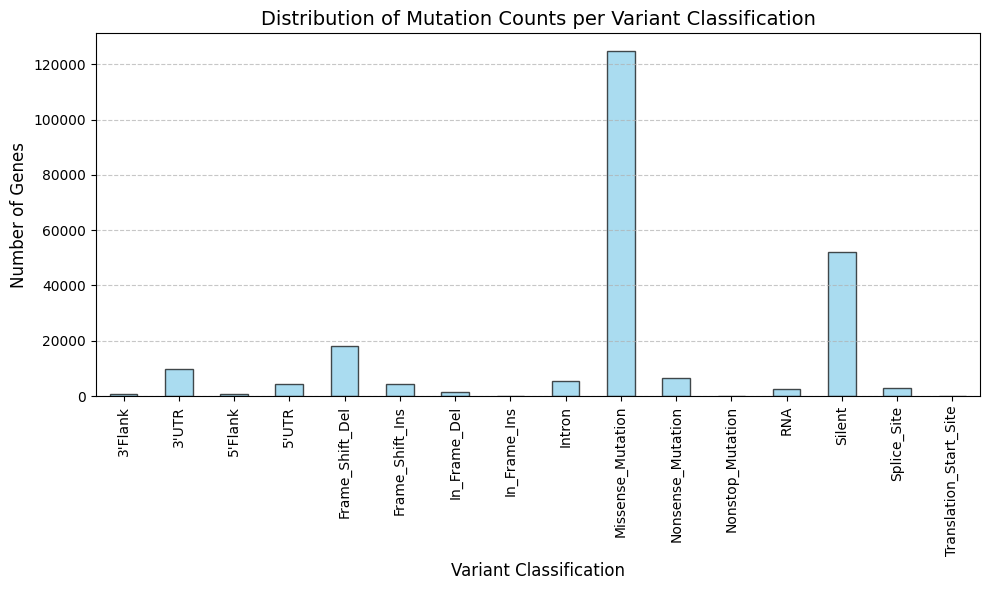

In [16]:
variant_classify = STAD_mutation.groupby("Variant_Classification").count().Center
plt.figure(figsize=(10,6))
variant_classify.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Variant Classification', fontsize=12)
plt.ylabel('Number of Genes', fontsize=12)
plt.title('Distribution of Mutation Counts per Variant Classification', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
STAD_mutation.columns

Index(['patient_id', 'Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build',
       'Chromosome', 'Start_Position', 'End_Position', 'Strand',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Tumor_Validation_Allele1', 'Tumor_Validation_Allele2', 'HGVSc',
       'HGVSp', 'Transcript_ID', 't_depth', 't_ref_count', 't_alt_count',
       'n_depth', 'Allele', 'Consequence', 'cDNA_position', 'CDS_position',
       'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation',
       'STRAND', 'CANONICAL', 'CCDS', 'ENSP', 'SWISSPROT', 'TREMBL', 'UNIPARC',
       'SIFT', 'PolyPhen', 'DOMAINS', 'IMPACT', 'VARIANT_CLASS', 'FILTER',
       'COSMIC', 'CALLERS', 'CONTEXT', 'NCALLERS', 'COSMIC_status'],
      dtype='object')

In [18]:
STAD_mutation['mutation'] = STAD_mutation.Reference_Allele + ">" + STAD_mutation.Tumor_Validation_Allele2

In [20]:
STAD_mutation.groupby(["IMPACT"]).count()

,patient_id,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Tumor_Validation_Allele1,Tumor_Validation_Allele2,HGVSc,HGVSp,Transcript_ID,t_depth,t_ref_count,t_alt_count,n_depth,Allele,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,STRAND,CANONICAL,CCDS,ENSP,SWISSPROT,TREMBL,UNIPARC,SIFT,PolyPhen,DOMAINS,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS,COSMIC_status,mutation
IMPACT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HIGH,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199,32199
LOW,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887,52887
MODERATE,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634,126634
MODIFIER,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221,23221


# Check CBase output

In [22]:
cbase_output = pd.read_csv("/Users/shuhaoxu/Desktop/BNFO285/Groupproject/ECE204Repo/project2/20250429cbase/q_values_20250429cbase.txt", sep='\t', header=1)

In [23]:
cbase_output[cbase_output.q_phi_neg < 0.05]

,gene,p_phi_m_neg,q_phi_m_neg,phi_m_neg,p_phi_k_neg,q_phi_k_neg,phi_k_neg,p_phi_neg,q_phi_neg,phi_neg,p_phi_m_pos,q_phi_m_pos,phi_m_pos_or_p(m=0|s),p_phi_k_pos,q_phi_k_pos,phi_k_pos_or_p(k=0|s),p_phi_pos,q_phi_pos,phi_pos_or_p(m=0|s)*p(k=0|s),m_obs,k_obs,s_obs,m_ell,k_ell,s_ell,m_mean,k_mean,dm/ds,dk/ds,d(m+k)/ds
6105,FUS,0.000025,0.062500,7.794956,0.002851,0.759406,1.339548,0.000007,0.033333,9.134505,1.0,1.0,0.000093,1.000000,1.000000,0.261964,1.000000,1.00000,0.000093,2,0,11,1057.145953,74.745599,473.397025,20.222410,1.429843,0.098899,0.000000,0.092368
7441,HSPA1L,0.000013,0.058333,8.197850,0.008889,0.852147,1.018363,0.000007,0.033333,9.216213,1.0,1.0,0.000093,1.000000,1.000000,0.361186,1.000000,1.00000,0.000093,4,0,13,1239.782946,48.173815,490.561403,27.336509,1.062219,0.146322,0.000000,0.140849
7812,INTS1,0.000005,0.033333,8.681065,0.108352,0.941074,0.429844,0.000007,0.033333,9.110908,1.0,1.0,0.000087,0.217862,1.000000,0.355928,0.693566,0.98938,0.356014,12,1,24,5839.330800,164.030353,2793.208342,44.153692,1.240312,0.271775,0.806245,0.286378
9687,MET,0.000004,0.033333,8.767377,0.475160,0.989437,0.148106,0.000014,0.042857,8.915483,1.0,1.0,0.000020,0.157532,0.963427,1.066615,0.435873,0.98938,1.066635,1,2,10,2315.259421,145.823338,967.607250,19.592399,1.234013,0.051039,1.620721,0.144046
12100,POLI,0.000000,0.000000,10.343413,0.208176,0.959402,0.315807,0.000004,0.033333,10.659220,1.0,1.0,0.000032,0.211767,1.000000,0.480203,0.645935,0.98938,0.480203,0,1,9,1172.322780,62.284537,447.601752,19.201886,1.020189,0.000000,0.980205,0.049450
14363,SLC17A9,0.000027,0.062500,7.702400,0.038871,0.900419,0.654766,0.000016,0.042857,8.357166,1.0,1.0,0.000130,1.000000,1.000000,0.519564,1.000000,1.00000,0.000130,3,0,13,1001.611821,30.471029,489.937554,22.113182,0.672732,0.135664,0.000000,0.131659
15884,TFRC,0.000018,0.062500,7.959166,0.059056,0.913535,0.542602,0.000014,0.042857,8.501769,1.0,1.0,0.000349,1.000000,1.000000,0.581234,1.000000,1.00000,0.000203,0,0,7,1312.550909,52.656113,528.698083,14.068800,0.564409,0.000000,0.000000,0.000000


In [24]:
cbase_output[(cbase_output.q_phi_pos < 0.001)].sort_values('m_ell', ascending=False)[:30]

,gene,p_phi_m_neg,q_phi_m_neg,phi_m_neg,p_phi_k_neg,q_phi_k_neg,phi_k_neg,p_phi_neg,q_phi_neg,phi_neg,p_phi_m_pos,q_phi_m_pos,phi_m_pos_or_p(m=0|s),p_phi_k_pos,q_phi_k_pos,phi_k_pos_or_p(k=0|s),p_phi_pos,q_phi_pos,phi_pos_or_p(m=0|s)*p(k=0|s),m_obs,k_obs,s_obs,m_ell,k_ell,s_ell,m_mean,k_mean,dm/ds,dk/ds,d(m+k)/ds
8639,LAMA2,1.000000,1.0,0.001091,1.000000,1.000000,0.000012,1.000000,1.000000,0.001103,0.001083,0.307071,6.567557,0.000031,0.033333,9.704479,0.0,0.0,16.272036,45,8,8,5394.217098,320.928624,2166.681736,16.155180,0.961163,2.785439,8.323215,3.096408
1008,ARID1B,1.000000,1.0,0.014055,1.000000,1.000000,0.000000,1.000000,1.000000,0.014055,0.016691,0.594309,3.916075,0.000002,0.003333,12.108728,0.0,0.0,16.024803,18,6,5,5280.653122,221.447317,3021.066099,7.205390,0.302163,2.498099,19.856631,3.196741
1007,ARID1A,1.000000,1.0,0.010578,1.000000,1.000000,0.000000,1.000000,1.000000,0.010578,0.011852,0.563230,4.251064,0.000000,0.000000,34.539576,0.0,0.0,38.790640,24,36,6,4850.465742,218.382443,2410.225033,9.808890,0.441628,2.446722,81.515766,5.853273
852,APC,0.697343,1.0,0.300384,1.000000,1.000000,0.000000,0.842705,1.000000,0.300384,0.254750,0.897123,1.224800,0.000000,0.000000,22.015208,0.0,0.0,23.240008,27,20,10,4353.139463,354.380470,1580.109230,22.558132,1.836422,1.196891,10.890643,1.926633
15841,TEX15,0.601323,1.0,0.431655,1.000000,1.000000,0.000000,0.748622,1.000000,0.431655,0.350180,0.913939,0.921754,0.000002,0.003333,14.292956,0.0,0.0,15.214710,20,11,9,3924.856206,222.161068,1562.101289,18.420545,1.042679,1.085727,10.549680,1.592724
1009,ARID2,0.975921,1.0,0.025828,1.000000,1.000000,0.000000,0.999125,1.000000,0.025828,0.028503,0.662757,3.381868,0.000000,0.000000,16.764324,0.0,0.0,20.146192,19,10,4,2891.717200,179.191273,1195.049280,8.284251,0.513357,2.293465,19.479489,3.296291
12986,RASA1,1.000000,1.0,0.019308,1.000000,1.000000,0.000000,1.000000,1.000000,0.019308,0.023732,0.634203,3.560679,0.000002,0.003333,13.679133,0.0,0.0,17.239812,12,7,1,1924.409406,127.272549,758.541253,4.004996,0.264878,2.996198,26.427133,4.449696
11809,PIK3CA,1.000000,1.0,0.000000,0.004514,0.792698,1.215568,0.241727,0.934619,1.215568,0.000000,0.000000,21.283038,1.000000,1.000000,0.296541,0.0,0.0,21.283038,95,0,5,1651.533101,180.556160,548.594966,12.409737,1.356731,7.655131,0.000000,6.900703
14705,SLITRK2,1.000000,1.0,0.000124,1.000000,1.000000,0.000155,1.000000,1.000000,0.000280,0.000170,0.179630,8.622509,0.000450,0.133871,6.726006,0.0,0.0,15.348516,30,4,3,1458.615117,82.109285,647.117106,6.278479,0.353437,4.778131,11.317363,5.126624
9432,MAP2K7,1.000000,1.0,0.000000,1.000000,1.000000,0.000689,1.000000,1.000000,0.000689,0.000000,0.000000,14.985872,0.009955,0.463552,3.733903,0.0,0.0,18.719776,29,1,0,1185.970261,21.390076,571.184190,1.364290,0.024605,21.255540,40.638308,21.598933


In [25]:
cbase_output[(cbase_output.q_phi_pos < 0.001)].sort_values('k_ell', ascending=False)[:30]

,gene,p_phi_m_neg,q_phi_m_neg,phi_m_neg,p_phi_k_neg,q_phi_k_neg,phi_k_neg,p_phi_neg,q_phi_neg,phi_neg,p_phi_m_pos,q_phi_m_pos,phi_m_pos_or_p(m=0|s),p_phi_k_pos,q_phi_k_pos,phi_k_pos_or_p(k=0|s),p_phi_pos,q_phi_pos,phi_pos_or_p(m=0|s)*p(k=0|s),m_obs,k_obs,s_obs,m_ell,k_ell,s_ell,m_mean,k_mean,dm/ds,dk/ds,d(m+k)/ds
852,APC,0.697343,1.0,0.300384,1.000000,1.000000,0.000000,0.842705,1.000000,0.300384,0.254750,0.897123,1.224800,0.000000,0.000000,22.015208,0.0,0.0,23.240008,27,20,10,4353.139463,354.380470,1580.109230,22.558132,1.836422,1.196891,10.890643,1.926633
8639,LAMA2,1.000000,1.0,0.001091,1.000000,1.000000,0.000012,1.000000,1.000000,0.001103,0.001083,0.307071,6.567557,0.000031,0.033333,9.704479,0.0,0.0,16.272036,45,8,8,5394.217098,320.928624,2166.681736,16.155180,0.961163,2.785439,8.323215,3.096408
15841,TEX15,0.601323,1.0,0.431655,1.000000,1.000000,0.000000,0.748622,1.000000,0.431655,0.350180,0.913939,0.921754,0.000002,0.003333,14.292956,0.0,0.0,15.214710,20,11,9,3924.856206,222.161068,1562.101289,18.420545,1.042679,1.085727,10.549680,1.592724
1008,ARID1B,1.000000,1.0,0.014055,1.000000,1.000000,0.000000,1.000000,1.000000,0.014055,0.016691,0.594309,3.916075,0.000002,0.003333,12.108728,0.0,0.0,16.024803,18,6,5,5280.653122,221.447317,3021.066099,7.205390,0.302163,2.498099,19.856631,3.196741
1007,ARID1A,1.000000,1.0,0.010578,1.000000,1.000000,0.000000,1.000000,1.000000,0.010578,0.011852,0.563230,4.251064,0.000000,0.000000,34.539576,0.0,0.0,38.790640,24,36,6,4850.465742,218.382443,2410.225033,9.808890,0.441628,2.446722,81.515766,5.853273
11809,PIK3CA,1.000000,1.0,0.000000,0.004514,0.792698,1.215568,0.241727,0.934619,1.215568,0.000000,0.000000,21.283038,1.000000,1.000000,0.296541,0.0,0.0,21.283038,95,0,5,1651.533101,180.556160,548.594966,12.409737,1.356731,7.655131,0.000000,6.900703
1009,ARID2,0.975921,1.0,0.025828,1.000000,1.000000,0.000000,0.999125,1.000000,0.025828,0.028503,0.662757,3.381868,0.000000,0.000000,16.764324,0.0,0.0,20.146192,19,10,4,2891.717200,179.191273,1195.049280,8.284251,0.513357,2.293465,19.479489,3.296291
12986,RASA1,1.000000,1.0,0.019308,1.000000,1.000000,0.000000,1.000000,1.000000,0.019308,0.023732,0.634203,3.560679,0.000002,0.003333,13.679133,0.0,0.0,17.239812,12,7,1,1924.409406,127.272549,758.541253,4.004996,0.264878,2.996198,26.427133,4.449696
14705,SLITRK2,1.000000,1.0,0.000124,1.000000,1.000000,0.000155,1.000000,1.000000,0.000280,0.000170,0.179630,8.622509,0.000450,0.133871,6.726006,0.0,0.0,15.348516,30,4,3,1458.615117,82.109285,647.117106,6.278479,0.353437,4.778131,11.317363,5.126624
12301,PPP3CA,0.908213,1.0,0.084506,1.000000,1.000000,0.000000,0.984934,1.000000,0.084506,0.102936,0.811819,2.103509,0.000002,0.003333,14.278784,0.0,0.0,16.382293,5,6,0,902.067601,50.413394,349.843062,1.694250,0.094685,2.951046,63.365133,6.148673
